In [1]:
# For Twitter API interactions:
%pip install tweepy
# install wordcloud (will be used in this task)
# 
# Alternatively, right here in the notebook (uncomment the next two lines and run):
import sys
%conda install -c conda-forge --yes --prefix {sys.prefix} tweepy wordcloud

Note: you may need to restart the kernel to use updated packages.
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import tweepy as tw
import config_twitter

In [4]:
# establish Twitter API connection
auth = tw.OAuthHandler(config_twitter.consumer_key, config_twitter.consumer_secret)
auth.set_access_token(config_twitter.access_token, config_twitter.access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [5]:
# returns False if credentials could not be verified, otherwise a user-object
# https://docs.tweepy.org/en/stable/api.html#API.verify_credentials
user = api.verify_credentials()
user

User(_api=<tweepy.api.API object at 0x7fde88955220>, _json={'id': 1414953849639612420, 'id_str': '1414953849639612420', 'name': 'Renata Perez', 'screen_name': 'RenataP56794649', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 0, 'listed_count': 0, 'created_at': 'Tue Jul 13 14:24:36 +0000 2021', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 0, 'lang': None, 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': 'F5F8FA', 'profile_background_image_url': None, 'profile_background_image_url_https': None, 'profile_background_tile': False, 'profile_image_url': 'http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png', 'profile_image_url_https': 'https://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png', 'profile_li

In [6]:
# Collect relevant tweets through the Twitter API.
import json
import tweepy as tw

In [7]:
# IMPORTANT: enter proper access credential in config_twitter.py file
import config_twitter

In [8]:
# function to establish an initial API connection, respecting the rate limit
def connect_api_client():
    auth = tw.OAuthHandler(config_twitter.consumer_key, config_twitter.consumer_secret)
    auth.set_access_token(config_twitter.access_token, config_twitter.access_token_secret)
    # https://docs.tweepy.org/en/stable/getting_started.html#api
    api = tw.API(auth, wait_on_rate_limit=True)
    try:
        # returns False if credentials could not be verified
        # https://docs.tweepy.org/en/stable/api.html#API.verify_credentials
        api.verify_credentials()
        user = api.verify_credentials()
        if not user:
            raise("Credentials could not be verified: Please check config.py")
        print(f"Connected to Twitter API as {user.name}")
    except Exception as e:
        raise e
    return api

In [9]:
api = connect_api_client()

Connected to Twitter API as Renata Perez


In [10]:
# construct a search query
query = 'Bitcoin OR "BCH" OR "BTC" -filter:retweets'

In [11]:
# decide how many tweets to query
###TODO increase this value later to collect a good dataset (try 2000 for instance)
ntweets = 2000

In [12]:
# search and collect relevant tweets
# https://docs.tweepy.org/en/stable/cursor_tutorial.html
# https://docs.tweepy.org/en/stable/code_snippet.html
tweets = [tweet._json for tweet in tw.Cursor(api.search, q=query, lang="en", tweet_mode='extended').items(ntweets)]
len(tweets)

2000

In [13]:
# example tweet content (json structure)
tweets[0]

{'created_at': 'Tue Jul 20 04:27:08 +0000 2021',
 'id': 1417340273349337089,
 'id_str': '1417340273349337089',
 'full_text': 'How low can you go?\n‘Cause I wanna know\nHow low can you go?\n\n#BTC',
 'truncated': False,
 'display_text_range': [0, 65],
 'entities': {'hashtags': [{'text': 'BTC', 'indices': [61, 65]}],
  'symbols': [],
  'user_mentions': [],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1369995171102916618,
  'id_str': '1369995171102916618',
  'name': 'Decentral Dog 🍖',
  'screen_name': 'thepiquebu',
  'location': 'Metaverse',
  'description': 'Just a tiny decentralized dog in a huge centralized world #crypto #hodler #theorizer | UX Designer & proud to be a part o

In [14]:
# save tweets data to json file
file_out = f"raw_tweet_data_{ntweets}.json"
with open(file_out, mode='w') as f:
    f.write(json.dumps(tweets, indent=2))

In [15]:
# Twitter data analysis task starter.
import html
import json
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# First collect the data in json-file; specify file name here (adjust the number as queried)
fjson = 'raw_tweet_data_2000.json'

In [17]:
# read json file with tweets data
# https://docs.python.org/3/tutorial/inputoutput.html#reading-and-writing-files
with open(fjson) as file:
    data = json.load(file)
len(data)

2000

In [18]:
# tweet data record example: as documented for the Twitter API
# https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet
data[0]

{'created_at': 'Tue Jul 20 04:27:08 +0000 2021',
 'id': 1417340273349337089,
 'id_str': '1417340273349337089',
 'full_text': 'How low can you go?\n‘Cause I wanna know\nHow low can you go?\n\n#BTC',
 'truncated': False,
 'display_text_range': [0, 65],
 'entities': {'hashtags': [{'text': 'BTC', 'indices': [61, 65]}],
  'symbols': [],
  'user_mentions': [],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1369995171102916618,
  'id_str': '1369995171102916618',
  'name': 'Decentral Dog 🍖',
  'screen_name': 'thepiquebu',
  'location': 'Metaverse',
  'description': 'Just a tiny decentralized dog in a huge centralized world #crypto #hodler #theorizer | UX Designer & proud to be a part o

In [19]:
# create pandas dataframe from tweet text content
# https://stackoverflow.com/a/43175477
df_tweets = pd.DataFrame([t['full_text'] for t in data], columns=['text'])
df_tweets

,text
0,How low can you go?\n‘Cause I wanna know\nHow ...
1,I think this is a project that has a good inno...
2,@Eljaboom Everyone want 20-25k $BTC . Whale sa...
3,When 60% of the top gainers on @binance are st...
4,"Watching 28793, if bounced, ok , otherwise i ..."
...,...
1995,#BTC is currently en route to its “lowest week...
1996,"@Minimum_Max @jessesingal As has been said, th..."
1997,@ZuccoNelson Bitcoin didn’t hold 30k and now I...
1998,@NCashOfficial I had limit orders set at .165 ...


In [20]:
# add selected columns from tweet data fields
df_tweets['retweets'] = [t['retweet_count'] for t in data]
df_tweets['favorites'] = [t['favorite_count'] for t in data]
df_tweets['user'] = [t['user']['screen_name'] for t in data]
df_tweets

,text,retweets,favorites,user
0,How low can you go?\n‘Cause I wanna know\nHow ...,0,0,thepiquebu
1,I think this is a project that has a good inno...,0,0,mah_062
2,@Eljaboom Everyone want 20-25k $BTC . Whale sa...,0,0,TunaZilliqa
3,When 60% of the top gainers on @binance are st...,0,0,sigiwardstone
4,"Watching 28793, if bounced, ok , otherwise i ...",0,0,Acousticmoron
...,...,...,...,...
1995,#BTC is currently en route to its “lowest week...,0,0,cryptofindertv
1996,"@Minimum_Max @jessesingal As has been said, th...",0,0,vv4isky
1997,@ZuccoNelson Bitcoin didn’t hold 30k and now I...,0,1,drewsuph_13
1998,@NCashOfficial I had limit orders set at .165 ...,0,0,memed_my


In [21]:
# text cleaning function: see prior class modules
stop_words = set(stopwords.words('english'))

# strictly speaking, this is a closure: uses a wider-scope variable stop_words
# (disregard this note if you are a Python beginner)
def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [22]:
# add clean text column
# NOTE: apply in pandas applies a function to each element of the selected column
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)
df_tweets

,text,retweets,favorites,user,text_clean
0,How low can you go?\n‘Cause I wanna know\nHow ...,0,0,thepiquebu,low go cause wan na know low go btc
1,I think this is a project that has a good inno...,0,0,mah_062,think project good innovation project one inte...
2,@Eljaboom Everyone want 20-25k $BTC . Whale sa...,0,0,TunaZilliqa,eljaboom everyone want btc whale said fucking ...
3,When 60% of the top gainers on @binance are st...,0,0,sigiwardstone,60 top gainers binance stable coins see signal...
4,"Watching 28793, if bounced, ok , otherwise i ...",0,0,Acousticmoron,watching 28793 bounced ok otherwise barely fin...
...,...,...,...,...,...
1995,#BTC is currently en route to its “lowest week...,0,0,cryptofindertv,btc currently en route lowest weekly close cur...
1996,"@Minimum_Max @jessesingal As has been said, th...",0,0,vv4isky,jessesingal said gpu useless bitcoin machines
1997,@ZuccoNelson Bitcoin didn’t hold 30k and now I...,0,1,drewsuph_13,zucconelson bitcoin didnt hold 30k im worried ...
1998,@NCashOfficial I had limit orders set at .165 ...,0,0,memed_my,ncashofficial limit orders set dont need bs co...


In [23]:
# sentiment analysis
def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)
df_tweets

,text,retweets,favorites,user,text_clean,polarity,subjectivity
0,How low can you go?\n‘Cause I wanna know\nHow ...,0,0,thepiquebu,low go cause wan na know low go btc,-0.066667,0.25
1,I think this is a project that has a good inno...,0,0,mah_062,think project good innovation project one inte...,0.600000,0.55
2,@Eljaboom Everyone want 20-25k $BTC . Whale sa...,0,0,TunaZilliqa,eljaboom everyone want btc whale said fucking ...,-0.600000,0.80
3,When 60% of the top gainers on @binance are st...,0,0,sigiwardstone,60 top gainers binance stable coins see signal...,0.500000,0.50
4,"Watching 28793, if bounced, ok , otherwise i ...",0,0,Acousticmoron,watching 28793 bounced ok otherwise barely fin...,0.183333,0.30
...,...,...,...,...,...,...,...
1995,#BTC is currently en route to its “lowest week...,0,0,cryptofindertv,btc currently en route lowest weekly close cur...,0.080000,0.47
1996,"@Minimum_Max @jessesingal As has been said, th...",0,0,vv4isky,jessesingal said gpu useless bitcoin machines,-0.500000,0.20
1997,@ZuccoNelson Bitcoin didn’t hold 30k and now I...,0,1,drewsuph_13,zucconelson bitcoin didnt hold 30k im worried ...,0.150000,0.85
1998,@NCashOfficial I had limit orders set at .165 ...,0,0,memed_my,ncashofficial limit orders set dont need bs co...,0.500000,0.50


In [24]:
# define the list of brands to analyze, consistent with the search topic
#  for which the tweets were collected
brands = ['tradestation', 'coinbase', 'etoro', 'kraken', 'bittrex', 'gemini', 'robinhood']

In [25]:
# start a brand comparison dataframe
df_brands = pd.DataFrame(brands, columns=['brand'])
df_brands

,brand
0,tradestation
1,coinbase
2,etoro
3,kraken
4,bittrex
5,gemini
6,robinhood


In [26]:
# example: tweet subset mentioning a given brand
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html
df_tweets[df_tweets['text_clean'].str.contains("robinhood")]

,text,retweets,favorites,user,text_clean,polarity,subjectivity
235,As Bitcoin Prices Slide Amid A Market Slowdown...,0,0,Linn28860343,bitcoin prices slide amid market slowdown robi...,0.0,0.0
887,Discounts on all. Good chance to lower your av...,0,0,ChrisDa61367591,discounts good chance lower averages speaking ...,0.7,0.6


In [27]:
# function to compute average sentiment of tweets mentioning a given brand
def brand_sentiment(b):
    return df_tweets[df_tweets['text_clean'].str.contains(b)]['polarity'].mean()

In [28]:
# brand sentiment comparison
df_brands['average_sentiment'] = df_brands['brand'].apply(brand_sentiment)
df_brands

,brand,average_sentiment
0,tradestation,NaN
1,coinbase,0.106429
2,etoro,0.250000
3,kraken,0.000000
4,bittrex,-0.015152
5,gemini,0.000000
6,robinhood,0.350000


In [29]:
# highest sentiment tweets
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
df_tweets.sort_values(by='polarity', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
807,Perfect #bitcoin #BitcoinCrash #BTC #BTCUSD #...,0,0,iqbalbitcoin,perfect bitcoin bitcoincrash btc btcusd btcusd...,1.0,1.0
528,Bitcoin’s price on July 19th:\n\n2012 $9\n2013...,0,3,rid2hi,bitcoins price july 19th 2012 9 2013 90 2014 6...,1.0,0.3
1737,I found #bitcoin in a User vault at this locat...,0,0,Pam54800084,found bitcoin user vault location join playing...,1.0,1.0
1382,I found #bitcoin in a User vault at this locat...,0,0,InevitableUBI,found bitcoin user vault location join playing...,1.0,1.0
1364,I found #bitcoin in a User vault at this locat...,0,0,Pam54800084,found bitcoin user vault location join playing...,1.0,1.0
1304,I found #bitcoin in a User vault at this locat...,0,0,KonnieTraffic,found bitcoin user vault location join playing...,1.0,1.0
99,I found #bitcoin in a User vault at this locat...,0,0,iAmSiklee,found bitcoin user vault location join playing...,1.0,1.0
114,@davidgokhshtein My best has been #dodge and #...,0,0,Ocean20111,davidgokhshtein best dodge bitcoin,1.0,0.3
1877,I found #bitcoin in a User vault at this locat...,0,0,InevitableUBI,found bitcoin user vault location join playing...,1.0,1.0
37,"Best Bitcoin quote i saw today:\n""Buy bitcoin ...",0,0,SatoshiConomy,best bitcoin quote saw today buy bitcoin need ...,1.0,0.3


In [30]:
# most retweeted content
df_tweets.sort_values(by='retweets', ascending=False).head(10)

,text,retweets,favorites,user,text_clean,polarity,subjectivity
1297,BREAKING: MICROSTRATEGY BOARD MEMBERS HAVE VOT...,70,418,stockmart_,breaking microstrategy board members voted fir...,0.000000,0.000000
740,The illiquid supply change for #bitcoin is fir...,34,241,TheCryptoLark,illiquid supply change bitcoin firmly showing ...,-0.200000,0.400000
1950,DON’T PANIC. IT’S JUST A CRASH WHICH IS HAPPEN...,22,147,ashwsbreal,dont panic crash happening last 12 years btc,0.000000,0.066667
931,#bitcoin miners are also refusing to sell here...,21,156,TheCryptoLark,bitcoin miners also refusing sell accumulating...,0.000000,0.000000
1682,10.5% of the total supply of #bitcoin was tran...,21,181,TheCryptoLark,total supply bitcoin transacted 31 34k means l...,0.000000,0.750000
1199,According to Glassnode an incredible 6.2 milli...,20,168,TheCryptoLark,according glassnode incredible million bitcoin...,0.592857,0.717857
1029,We are also seeing the market separating the m...,19,163,TheCryptoLark,also seeing market separating men boys exchang...,0.000000,0.000000
1423,#bitcoin investors continue to realize signifi...,14,123,TheCryptoLark,bitcoin investors continue realize significant...,0.375000,0.875000
69,$BTC IS UNDER $30K SOMEONE CALL SATOSHI NAKAMO...,14,55,wsbmod,btc 30k someone call satoshi nakamoto close ma...,0.000000,0.000000
1857,BITCOIN IN NEAR FREEFALL AGAIN AS $100 BILLION...,13,54,DrTrillions,bitcoin near freefall 100 billion wiped crypto...,-0.075000,0.325000


In [31]:
# users producing most retweeted content
df_tweets.sort_values(by='retweets', ascending=False).head(10)['user']

1297       stockmart_
740     TheCryptoLark
1950       ashwsbreal
931     TheCryptoLark
1682    TheCryptoLark
1199    TheCryptoLark
1029    TheCryptoLark
1423    TheCryptoLark
69             wsbmod
1857      DrTrillions
Name: user, dtype: object

In [32]:
# combine all text for a specific brand
def brand_all_text(b):
    # https://stackoverflow.com/a/51871650
    return ' '.join(df_tweets[df_tweets['text_clean'].str.contains(b)]['text_clean'])

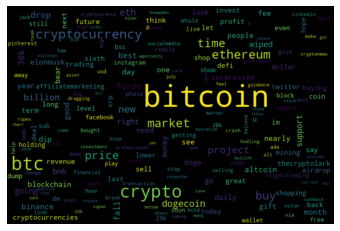

In [33]:
# most common twet content keywords for a specific brand
# https://amueller.github.io/word_cloud/auto_examples/single_word.html#sphx-glr-auto-examples-single-word-py
# https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud
b = 'bit'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(brand_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()